# Netflix Movies and TV Shows Dataset
* **show_id**: A unique identifier for each title.
* **type**: The category of the title, which is either 'Movie' or 'TV Show'.
* **title**: The name of the movie or TV show.
* **director**: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)
* **cast**: The list of main actors/actresses in the title. (Some entries might not have this information.)
* **country**: The country or countries where the movie or TV show was produced.
* **date_added**: The date the title was added to Netflix.
* **release_year**: The year the movie or TV show was originally released.
* **rating**: The age rating of the title.
* **duration**: The duration of the title, in minutes for movies and seasons for TV shows.
* **listed_in**: The genres the title falls under.
* **description**: A brief summary of the title.

# References
- https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
- https://www.kaggle.com/code/lp2595/netflix-movies-and-tv-shows-eda#Let's-start-EDA!

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='latin1')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Filter out any columns with 'Unnamed' in their names, retaining only the first 12 relevant columns. 

In [5]:
df = df[df.columns[:12]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [6]:
# Check missing values

(df.isna().mean() * 100).round(1)

show_id          0.0
type             0.0
title            0.0
director        29.9
cast             9.4
country          9.4
date_added       0.1
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
dtype: float64

To handle missing data in our dataset, we will apply the following strategies:
- Replace missing values in the 'director' and 'cast' columns with the string 'No Data'.
- Replace missing values in the 'country' column with the most common country (mode).
- Drop rows with missing values in the 'date_added' column, as they constitute less than 0.1% of the data.

In [7]:
df[['director', 'cast']] = df[['director', 'cast']].fillna('No Data')

df['country'] = df['country'].fillna(df['country'].mode()[0])

df.dropna(inplace=True)

In [8]:
# Check for duplicates
print(f'Amount of duplicates: {df.duplicated().sum()}')

Amount of duplicates: 0


In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8792 non-null   object
 1   type          8792 non-null   object
 2   title         8792 non-null   object
 3   director      8792 non-null   object
 4   cast          8792 non-null   object
 5   country       8792 non-null   object
 6   date_added    8792 non-null   object
 7   release_year  8792 non-null   int64 
 8   rating        8792 non-null   object
 9   duration      8792 non-null   object
 10  listed_in     8792 non-null   object
 11  description   8792 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.9+ KB


Convert the 'date_added' column from an object to a datetime format for better manipulation and analysis.

In [11]:
# Convert date from object to datetime
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed')

# Extract month and year
df['month_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

# Visualizations

In [12]:
netflix_palette = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']

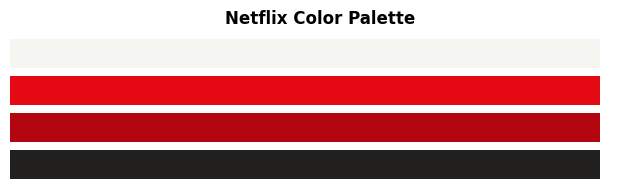

In [13]:
fig, ax = plt.subplots(figsize=(8, 2))

# Remove axis ticks and labels
ax.axis('off')

# Plot blocks of colors
for i, color in enumerate(netflix_palette):
    ax.barh(i, 1, color=color)

plt.title('Netflix Color Palette', fontsize=12, fontweight='bold')
plt.show()

In [14]:
# Count of Movies and Tv Shows
type_counts = df['type'].value_counts()

# Calculate proportion
total_counts = type_counts.sum()
type_percentages = (type_counts / total_counts) * 100

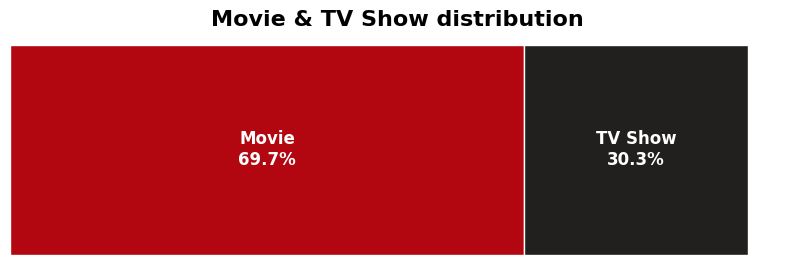

,Count,Proportion
type,,
Movie,6127,69.7
TV Show,2665,30.3


In [15]:
colors = [netflix_palette[1], netflix_palette[0]]

fig, ax = plt.subplots(figsize=(10, 3))  

# Create a horizontal bar chart with percentages
ax.barh([''], [type_percentages['Movie']], color=colors[0], edgecolor='white', label='Movie')
ax.barh([''], [type_percentages['TV Show']], color=colors[1], left=[type_percentages['Movie']], edgecolor='white', label='TV Show')

# Add text labels inside the boxes with percentages
ax.text(type_percentages['Movie'] / 2, 0, f'Movie\n{type_percentages["Movie"]:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
ax.text(type_percentages['Movie'] + type_percentages['TV Show'] / 2, 0, f'TV Show\n{type_percentages["TV Show"]:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Remove y-axis labels and ticks
ax.set_yticks([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Movie & TV Show distribution', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

type_df = pd.DataFrame({
    'Count': type_counts,
    'Proportion': type_percentages
})

type_df['Proportion'] = type_df['Proportion'].round(1)
type_df

In [16]:
# Get the top 10 countries and their counts
country_counts = df['country'].value_counts().head(10)

# Get the top 3 countries and their counts
top_countries = country_counts.index[:3]
top_counts = country_counts.values[:3]

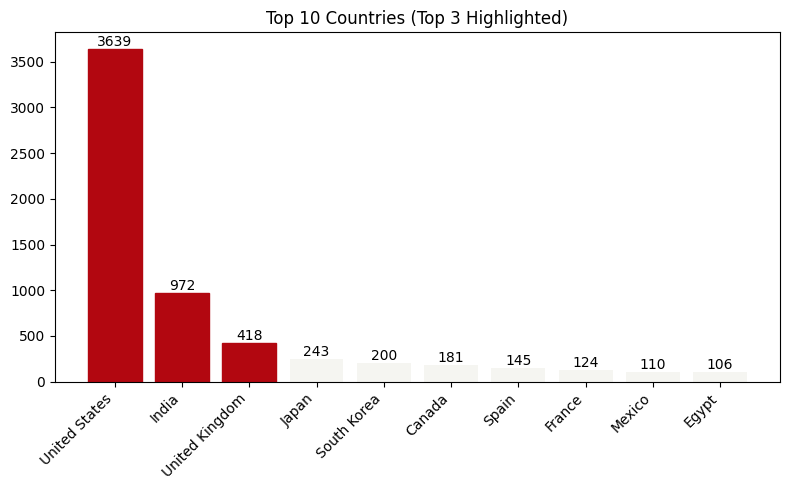

In [17]:
plt.figure(figsize=(8, 5))  # Adjust figure size as desired

# Plot bars for all countries
bars = plt.bar(country_counts.index, country_counts.values, color=netflix_palette[3])  # Set all bars to the background color initially

# Highlight top 3 countries in red
for country, count, bar in zip(top_countries, top_counts, bars):
    bar.set_color(netflix_palette[1])  # Set color to red for top 3 countries

# Add count values on top of bars
for bar, count in zip(bars, country_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

plt.title('Top 10 Countries (Top 3 Highlighted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The USA, being Netflix's home country, has by far the most content available. India follows as the runner-up, though with a significantly smaller library. The UK comes in third place.

In [18]:
# Count movies and TV shows per country
movie_counts_country = df[df['type'] == 'Movie']['country'].value_counts()
tv_show_counts_country = df[df['type']=='TV Show']['country'].value_counts()

# Combine counts into a single DataFrame with total (use fillna(0) for missing values)
df_counts = pd.DataFrame({
    'Movie': movie_counts_country,
    'TV Show': tv_show_counts_country,
}).fillna(0)

df_counts['Total Count'] = df_counts.sum(axis=1)

# Sort by total count, and get top 10
top_10_counts = df_counts.sort_values(by='Total Count', ascending=False).head(10)

# Calculate and add proportions to top 10 counts
top_10_counts['Movie_pct'] = top_10_counts['Movie'] / top_10_counts['Total Count'] * 100
top_10_counts['TV_Show_pct'] = top_10_counts['TV Show'] / top_10_counts['Total Count'] * 100

# Sort again, this time by Movie proportion
top_10_counts = top_10_counts.sort_values(by='Movie_pct', ascending=True)

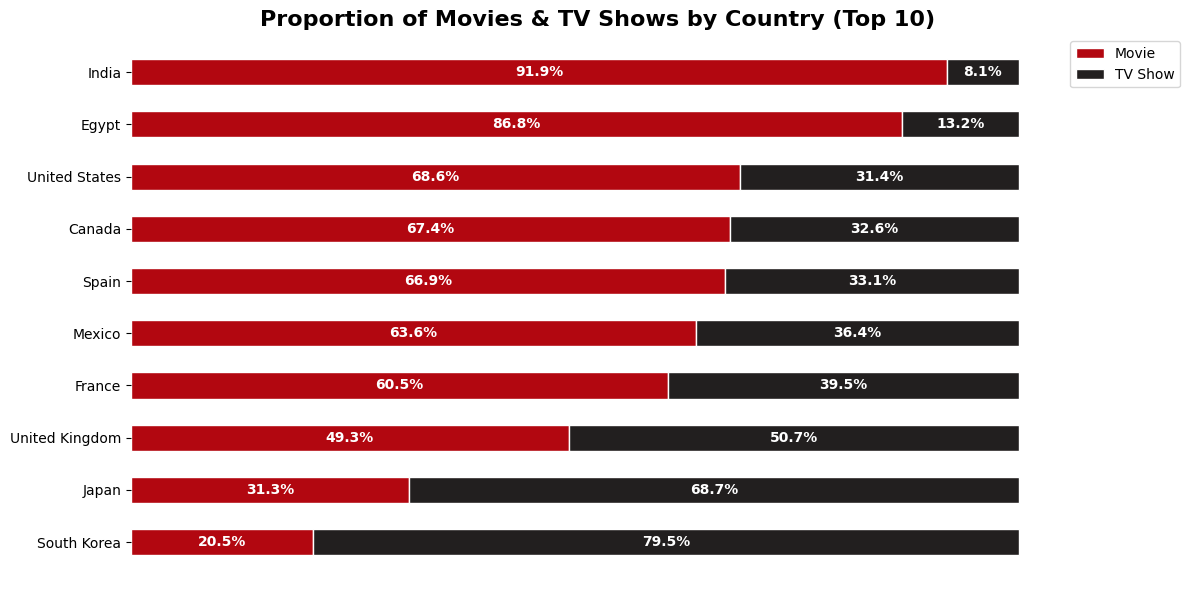

In [19]:
# Data preparation for plotting
countries = top_10_counts.index
movies_pct = top_10_counts['Movie_pct']
tv_shows_pct = top_10_counts['TV_Show_pct']

colors = [netflix_palette[1], netflix_palette[0]]

fig, ax = plt.subplots(figsize=(12, 6))

# Create a horizontal stacked bar chart
bar_width = 0.5 
for i, country in enumerate(countries):
    ax.barh(i, movies_pct[i], color=colors[0], edgecolor='white', height=bar_width, label='Movie' if i == 0 else "")
    ax.barh(i, tv_shows_pct[i], color=colors[1], edgecolor='white', height=bar_width, left=movies_pct[i], label='TV Show' if i == 0 else "")

    # Add text labels inside the boxes with percentages
    ax.text(movies_pct[i] / 2, i, f'{movies_pct[i]:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(movies_pct[i] + tv_shows_pct[i] / 2, i, f'{tv_shows_pct[i]:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Set y-axis labels to countries
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)

# Remove x-axis labels and ticks
ax.set_xticks([])
ax.set_xticklabels([])

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Set title
plt.title('Proportion of Movies & TV Shows by Country (Top 10)', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Netflix's content in India and Egypt is predominantly movies. The UK offers the most balanced mix, with 49.3% movies and 50.7% TV shows. In contrast, the majority of Netflix's library in Japan and South Korea consists of TV shows.

In [20]:
df['year_added'].value_counts()

year_added
2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2024       2
2010       1
Name: count, dtype: int64

In [21]:
# drop year 2024, as it is probably not complete
df = df[df['year_added']!=2024]

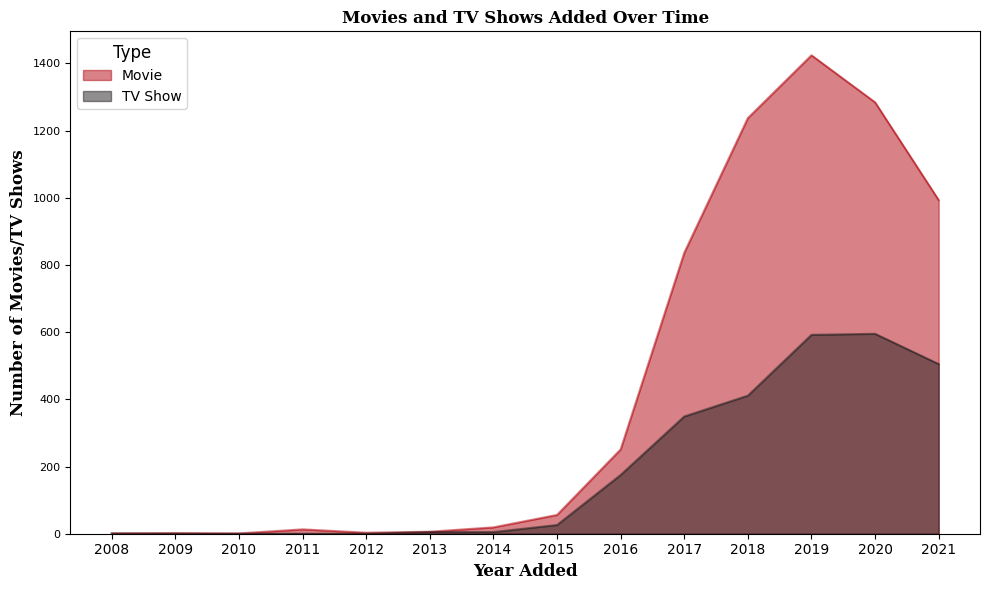

In [22]:
df_grouped = df.groupby(['year_added', 'type'])['type'].count().unstack(fill_value=0)

colors = [netflix_palette[1], netflix_palette[0]]

fig, ax = plt.subplots(figsize=(10, 6))
df_grouped.plot(kind='area', stacked=False, ax=ax, color=colors)
ax.set_title('Movies and TV Shows Added Over Time', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Year Added', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_ylabel('Number of Movies/TV Shows', fontsize=12, fontweight='bold', fontfamily='serif')
ax.legend(title='Type', fontsize=10, title_fontsize=12)

# Adjust tick labels
plt.xticks(df['year_added'].unique(), fontsize=10)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In 2019, Netflix experienced its peak in global content count. We can see that they focused more on adding movies than TV shows, with movies also increasing much faster. Additionally, content additions appear to have declined in 2020, likely due to the COVID-19 pandemic.

In [23]:
monthly_additions = df['month_added'].value_counts().reset_index()

# Define months by the right order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set 'month_added' as a categorical type with the specified order
monthly_additions['month_added'] = pd.Categorical(monthly_additions['month_added'], categories=month_order, ordered=True)

# Sort by month added
monthly_additions.sort_values('month_added', inplace=True)

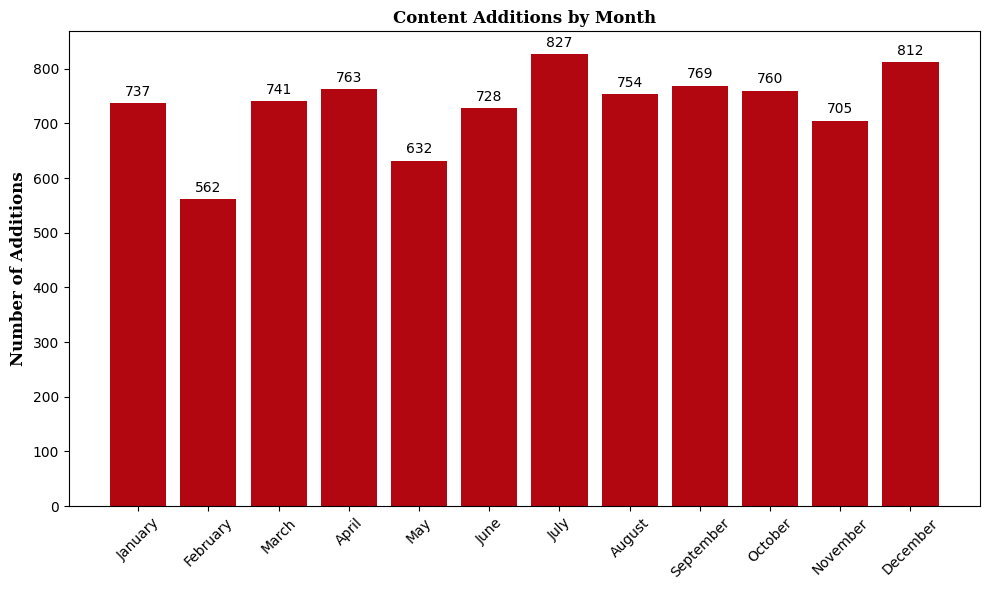

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
bars = ax.bar(monthly_additions['month_added'], monthly_additions['count'], color=netflix_palette[1])

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title('Content Additions by Month', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_ylabel('Number of Additions', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Overall, content uploads are relatively consistent across the months, with July and December having the highest counts. The high count in December may be due to the holiday season, which could lead to increased viewership and demand for new content. Additionally, February's lower count could be influenced by its shorter duration, potentially resulting in fewer upload opportunities.



# Testing for Differences in Upload Counts Across Months

- **Null Hypothesis (H0)**: The number of uploads does not vary significantly between months.

- **Alternative Hypothesis (H1)**: The number of uploads varies significantly between months. (eg: February having the fewest uploads)

### Strategy

To test these hypotheses, we perform a chi-square goodness-of-fit test. We compare the observed number of uploads each month to the expected number, assuming uploads are evenly distributed based on the number of days in each month.

### Preparing data

In [25]:
# Rename columns
monthly_additions = monthly_additions.rename(columns={'month_added': 'Month', 'count': 'Observed'})

days_in_month = {
    'January': 31, 'February': 28, 'March': 31, 'April': 30,
    'May': 31, 'June': 30, 'July': 31, 'August': 31,
    'September': 30, 'October': 31, 'November': 30, 'December': 31
}
total_days = 365

# Calculate expected proportion
expected_proportions = {month: days / total_days for month, days in days_in_month.items()}

# Make a df out of days_in_month dictionary
days_df = pd.DataFrame(list(days_in_month.items()), columns=['Month', 'Days'])

# Merge with monthly_additions
monthly_additions = pd.merge(monthly_additions, days_df, on='Month')

In [26]:
# Merge the expected proportions data
expected_props_df = pd.DataFrame(list(expected_proportions.items()), columns=['Month', 'Expected Proportion'])
monthly_additions = pd.merge(monthly_additions, expected_props_df, on='Month')

In [27]:
# Calculate observed proportion
total_observed_counts = monthly_additions['Observed'].sum()
monthly_additions['Observed Proportion'] = monthly_additions['Observed'] / total_observed_counts

# Calculate expected counts
expected_counts = {month: prop * total_observed_counts for month, prop in expected_proportions.items()}
expected_counts_df = pd.DataFrame(list(expected_counts.items()), columns=['Month', 'Expected'])

# Merge expected counts
comparison_df = pd.merge(monthly_additions, expected_counts_df, on='Month')

In [28]:
# Resetting indexes to match the month
comparison_df.reset_index(drop=True,inplace=True)
comparison_df.index = comparison_df.index + 1

# Rearrange order of columns
comparison_df = comparison_df[['Month', 'Days', 'Observed', 'Expected', 'Observed Proportion', 'Expected Proportion']]

comparison_df

,Month,Days,Observed,Expected,Observed Proportion,Expected Proportion
1,January,31,737,746.547945,0.083845,0.084932
2,February,28,562,674.301370,0.063936,0.076712
3,March,31,741,746.547945,0.084300,0.084932
4,April,30,763,722.465753,0.086803,0.082192
5,May,31,632,746.547945,0.071900,0.084932
6,June,30,728,722.465753,0.082821,0.082192
7,July,31,827,746.547945,0.094084,0.084932
8,August,31,754,746.547945,0.085779,0.084932
9,September,30,769,722.465753,0.087486,0.082192
10,October,31,760,746.547945,0.086462,0.084932


# Perform Chi-Square Test

In [29]:
from scipy.stats import chisquare

observed = comparison_df['Observed'].tolist()
expected = comparison_df['Expected'].tolist()

# Perform chi-square goodness-of-fit test
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
print(f'chi squared: {chi2_stat}')
print(f'p-value: {p_val}')

chi squared: 56.90363289871715
p-value: 3.466089131963007e-08


### [Table: Chi-Square Probabilities](https://people.richland.edu/james/lecture/m170/tbl-chi.html)

[![Table: Chi-Square Probabilities](https://i.postimg.cc/VvLfWfkS/Untitled-design-1.jpg)](https://postimg.cc/njgfHt7Z)

In a chi-squared test, the degrees of freedom are determined by subtracting 1 from the number of categories. Since we're comparing data across 12 months, we have 11 degrees of freedom.

# Results

The **chi-square** statistic is **56.90**. This value is significantly higher than the critical value at the 0.05 level of significance, indicating that we can reject the null hypothesis.

Additionally, the **p-value** is **3.47 * 10⁻⁸**, which is much less than 0.05. A p-value below 5% indicates strong evidence against the null hypothesis.

# Conclusion

Based on the chi-square statistic and the p-value, <code style="background:yellow;color:black">we reject the null hypothesis and conclude that there is a significant difference in the number of uploads between months.</code>
